In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('/content/melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

# Data Preprocessing Part 1

In [ ]:
#Check the number of unique value from all of the object datatype
df.select_dtypes(include='object').nunique()

Suburb           314
Address        13378
Type               3
Method             5
SellerG          268
Date              58
CouncilArea       33
Regionname         8
dtype: int64

In [ ]:
# Remove column with high unique value
df.drop(columns=['Suburb','Address','SellerG'], inplace=True)
df.head()

,Rooms,Type,Price,Method,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,2,h,1480000.0,S,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,h,1035000.0,S,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,3,h,1465000.0,SP,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,3,h,850000.0,PI,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,4,h,1600000.0,VB,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
# Extract year from 'Date' column
df['Date'] = df['Date'].str[-4:]
df.head()

,Rooms,Type,Price,Method,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,2,h,1480000.0,S,2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,h,1035000.0,S,2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,3,h,1465000.0,SP,2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,3,h,850000.0,PI,2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,4,h,1600000.0,VB,2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
# Convert 'Date' column to integer
df['Date'] = df['Date'].astype(float)

# Segment Council Area into smaller unique value number

In [ ]:
df['CouncilArea'].unique()

array(['Yarra', 'Moonee Valley', 'Port Phillip', 'Darebin', 'Hobsons Bay',
       'Stonnington', 'Boroondara', 'Monash', 'Glen Eira', 'Whitehorse',
       'Maribyrnong', 'Bayside', 'Moreland', 'Manningham', 'Banyule',
       'Melbourne', 'Kingston', 'Brimbank', 'Hume', nan, 'Knox',
       'Maroondah', 'Casey', 'Melton', 'Greater Dandenong', 'Nillumbik',
       'Whittlesea', 'Frankston', 'Macedon Ranges', 'Yarra Ranges',
       'Wyndham', 'Cardinia', 'Unavailable', 'Moorabool'], dtype=object)

In [ ]:
df['CouncilArea'].value_counts()

Moreland             1163
Boroondara           1160
Moonee Valley         997
Darebin               934
Glen Eira             848
Stonnington           719
Maribyrnong           692
Yarra                 647
Port Phillip          628
Banyule               594
Bayside               489
Melbourne             470
Hobsons Bay           434
Brimbank              424
Monash                333
Manningham            311
Whitehorse            304
Kingston              207
Whittlesea            167
Hume                  164
Wyndham                86
Knox                   80
Maroondah              80
Melton                 66
Frankston              53
Greater Dandenong      52
Casey                  38
Nillumbik              36
Yarra Ranges           18
Cardinia                8
Macedon Ranges          7
Unavailable             1
Moorabool               1
Name: CouncilArea, dtype: int64

In [ ]:
def segment_council_area(area):
    if area in ['Yarra', 'Port Phillip', 'Stonnington', 'Boroondara']:
        return 'Inner Melbourne'
    elif area in ['Moonee Valley', 'Darebin', 'Hobsons Bay', 'Maribyrnong', 'Bayside', 'Moreland', 'Melbourne']:
        return 'Middle Melbourne'
    elif area in ['Monash', 'Glen Eira', 'Whitehorse', 'Banyule', 'Kingston']:
        return 'Outer Melbourne'
    else:
        return 'Other'

df['CouncilArea'] = df['CouncilArea'].apply(segment_council_area)

In [ ]:
df['CouncilArea'].value_counts()

Middle Melbourne    5179
Inner Melbourne     3154
Other               2961
Outer Melbourne     2286
Name: CouncilArea, dtype: int64

<Axes: >

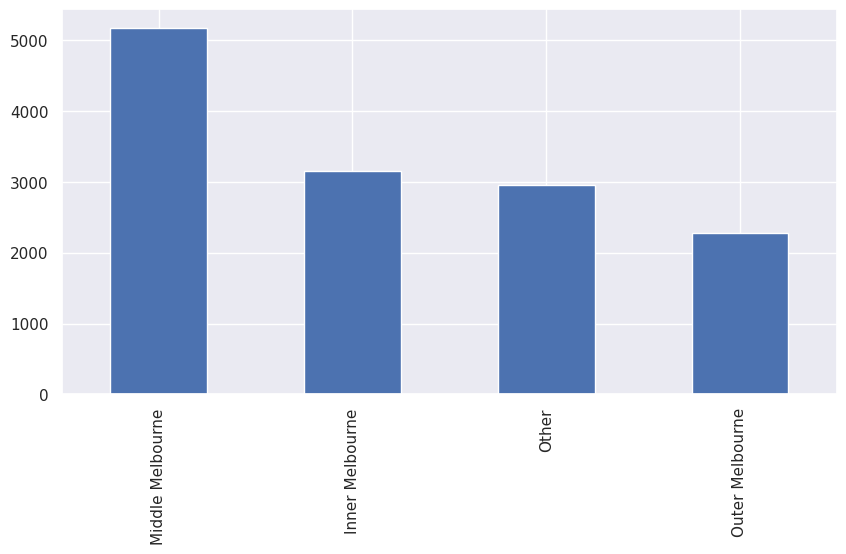

In [ ]:
plt.figure(figsize=(10,5))
df['CouncilArea'].value_counts().plot(kind='bar')

In [ ]:
#Check the number of unique value from all of the object datatype
df.select_dtypes(include='object').nunique()

Type           3
Method         5
CouncilArea    4
Regionname     8
dtype: int64

In [ ]:
df.head()

,Rooms,Type,Price,Method,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,2,h,1480000.0,S,2016.0,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Inner Melbourne,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,h,1035000.0,S,2016.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Inner Melbourne,-37.8079,144.9934,Northern Metropolitan,4019.0
2,3,h,1465000.0,SP,2017.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Inner Melbourne,-37.8093,144.9944,Northern Metropolitan,4019.0
3,3,h,850000.0,PI,2017.0,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Inner Melbourne,-37.7969,144.9969,Northern Metropolitan,4019.0
4,4,h,1600000.0,VB,2016.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Inner Melbourne,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
df.drop(columns='Postcode', inplace=True)
df.head()

,Rooms,Type,Price,Method,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,2,h,1480000.0,S,2016.0,2.5,2.0,1.0,1.0,202.0,NaN,NaN,Inner Melbourne,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,h,1035000.0,S,2016.0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,Inner Melbourne,-37.8079,144.9934,Northern Metropolitan,4019.0
2,3,h,1465000.0,SP,2017.0,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,Inner Melbourne,-37.8093,144.9944,Northern Metropolitan,4019.0
3,3,h,850000.0,PI,2017.0,2.5,3.0,2.0,1.0,94.0,NaN,NaN,Inner Melbourne,-37.7969,144.9969,Northern Metropolitan,4019.0
4,4,h,1600000.0,VB,2016.0,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,Inner Melbourne,-37.8072,144.9941,Northern Metropolitan,4019.0


# Exploratory Data Analysis

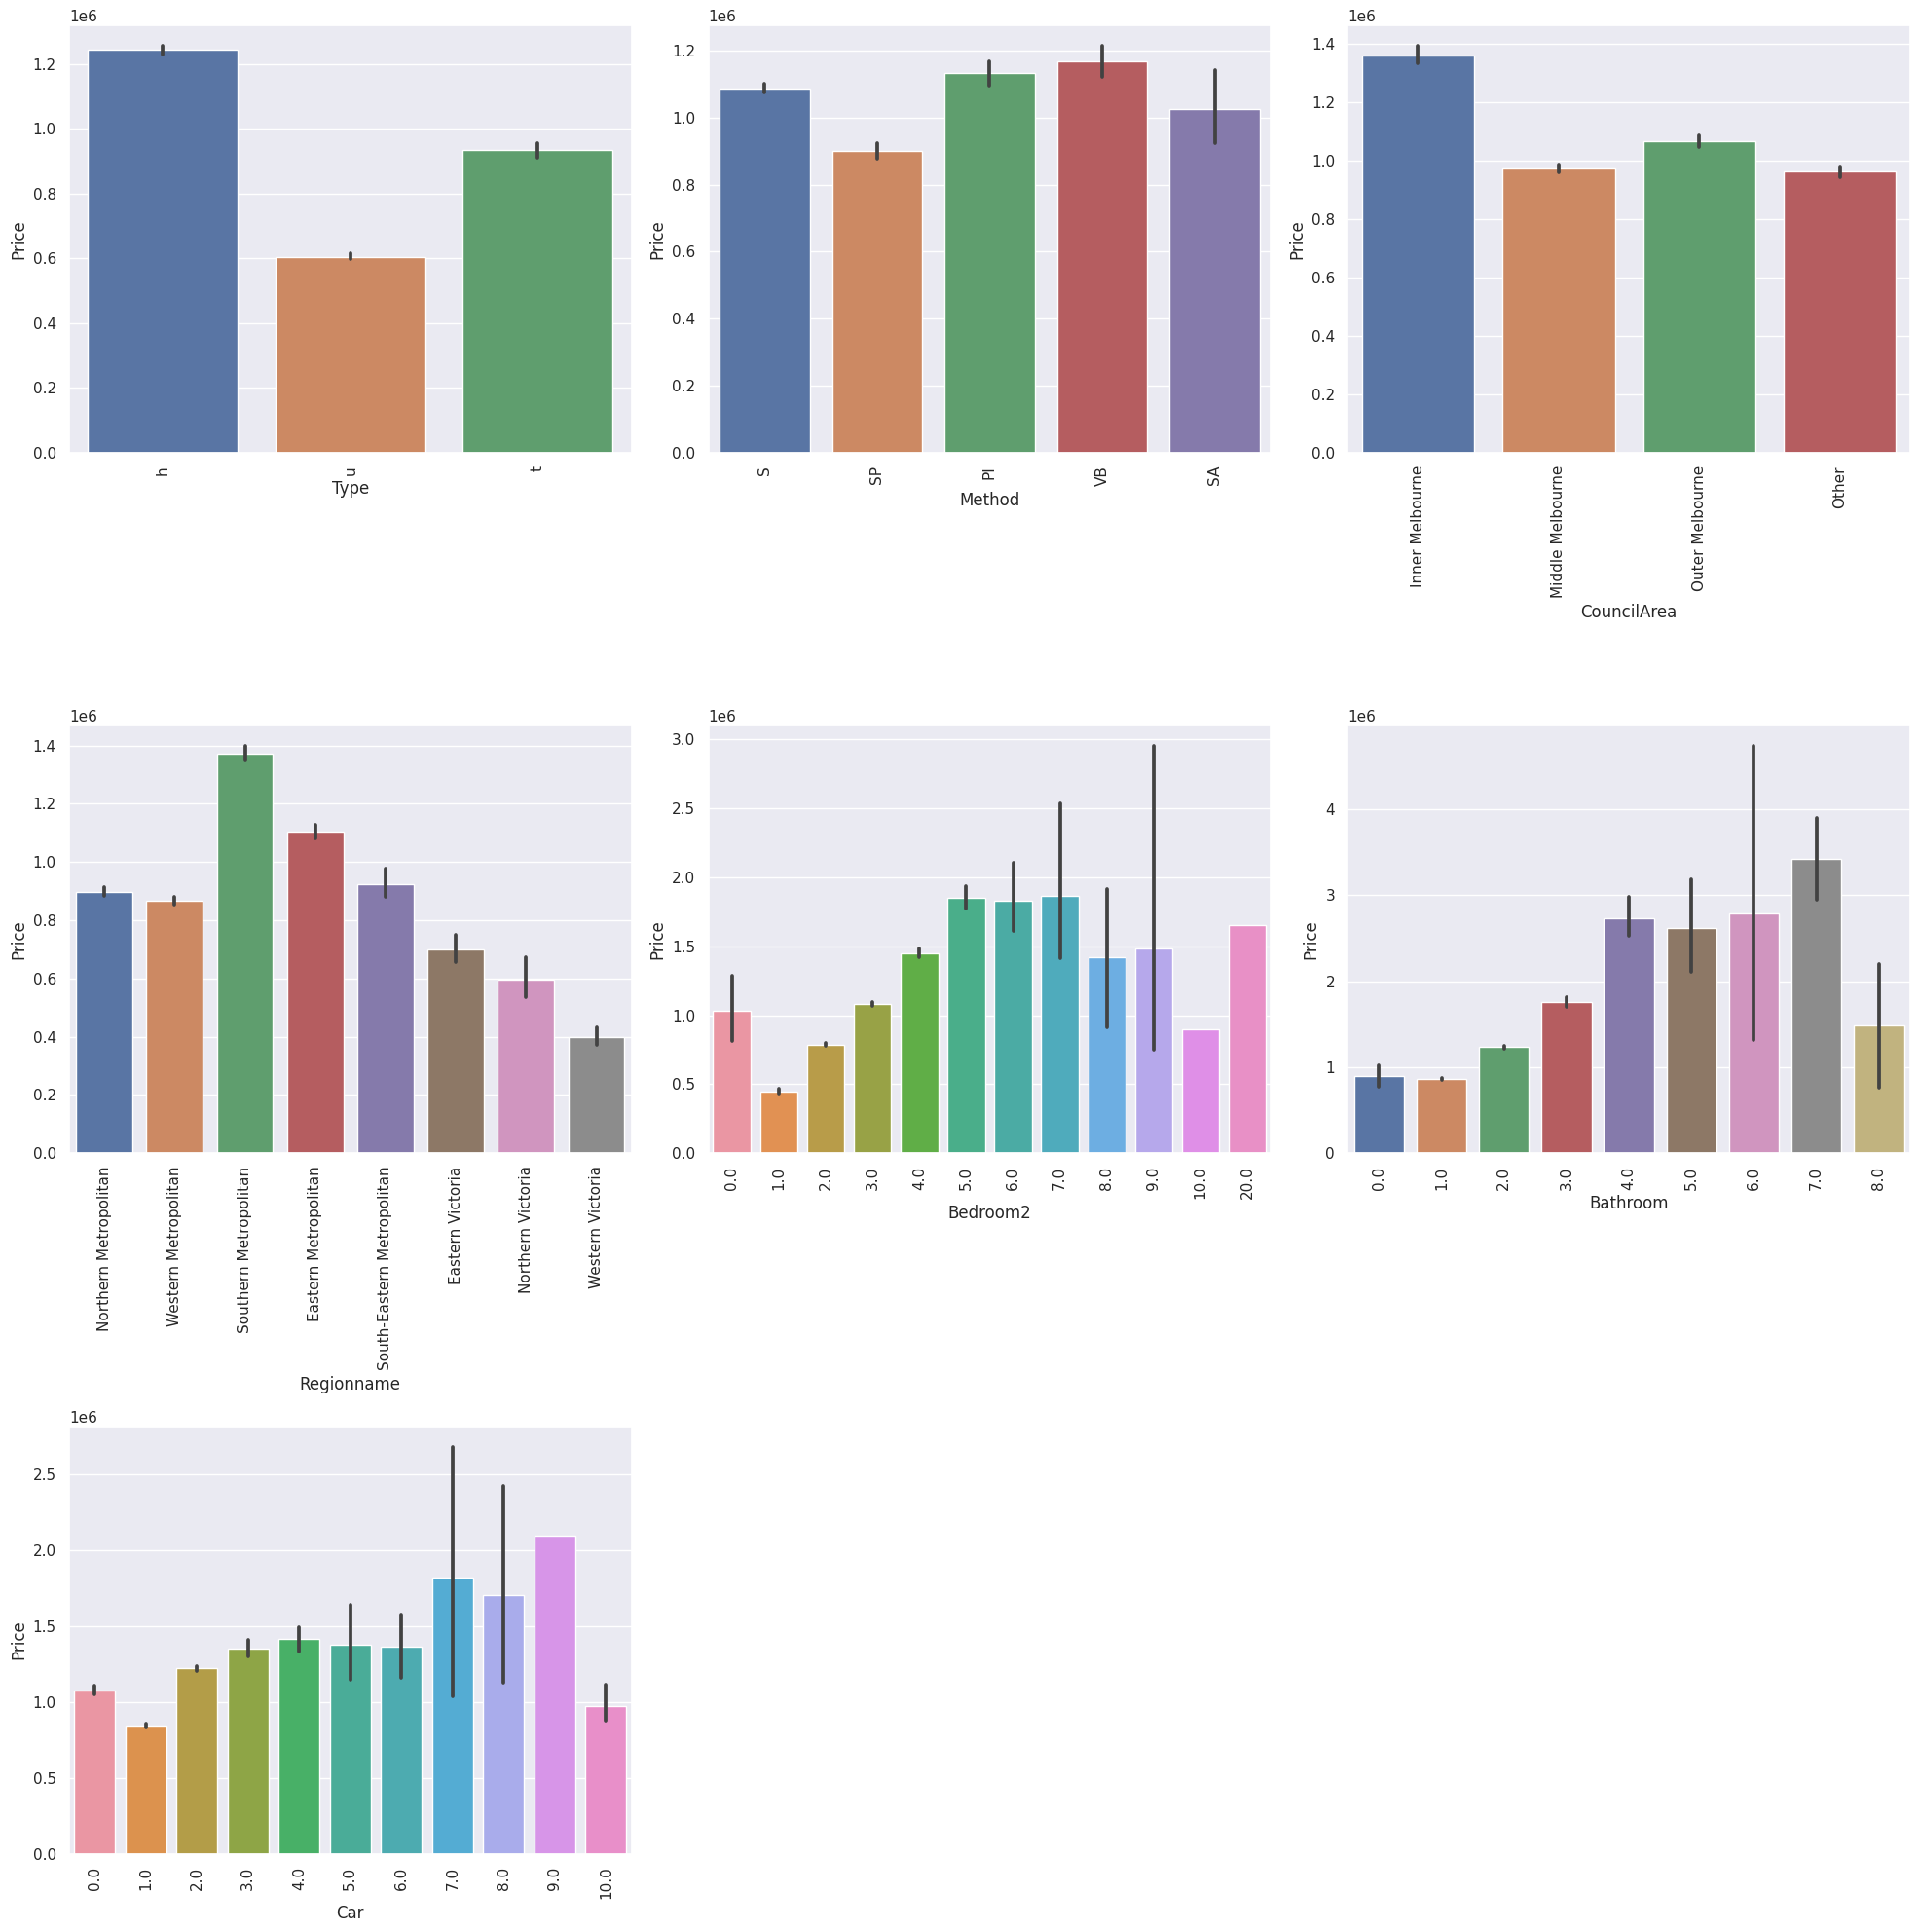

In [ ]:
# list of categorical variables to plot
cat_vars = ['Type', 'Method', 'CouncilArea', 'Regionname', 'Bedroom2', 'Bathroom', 'Car']

# create figure with subplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.barplot(x=var, y='Price', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# remove the eighth subplot
fig.delaxes(axs[7])

# remove the ninth subplot
fig.delaxes(axs[8])

# show plot
plt.show()

<ipython-input-21-ff3dbb8c1dbf>:19: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cat_counts = cat_counts_top.append(cat_counts_other)


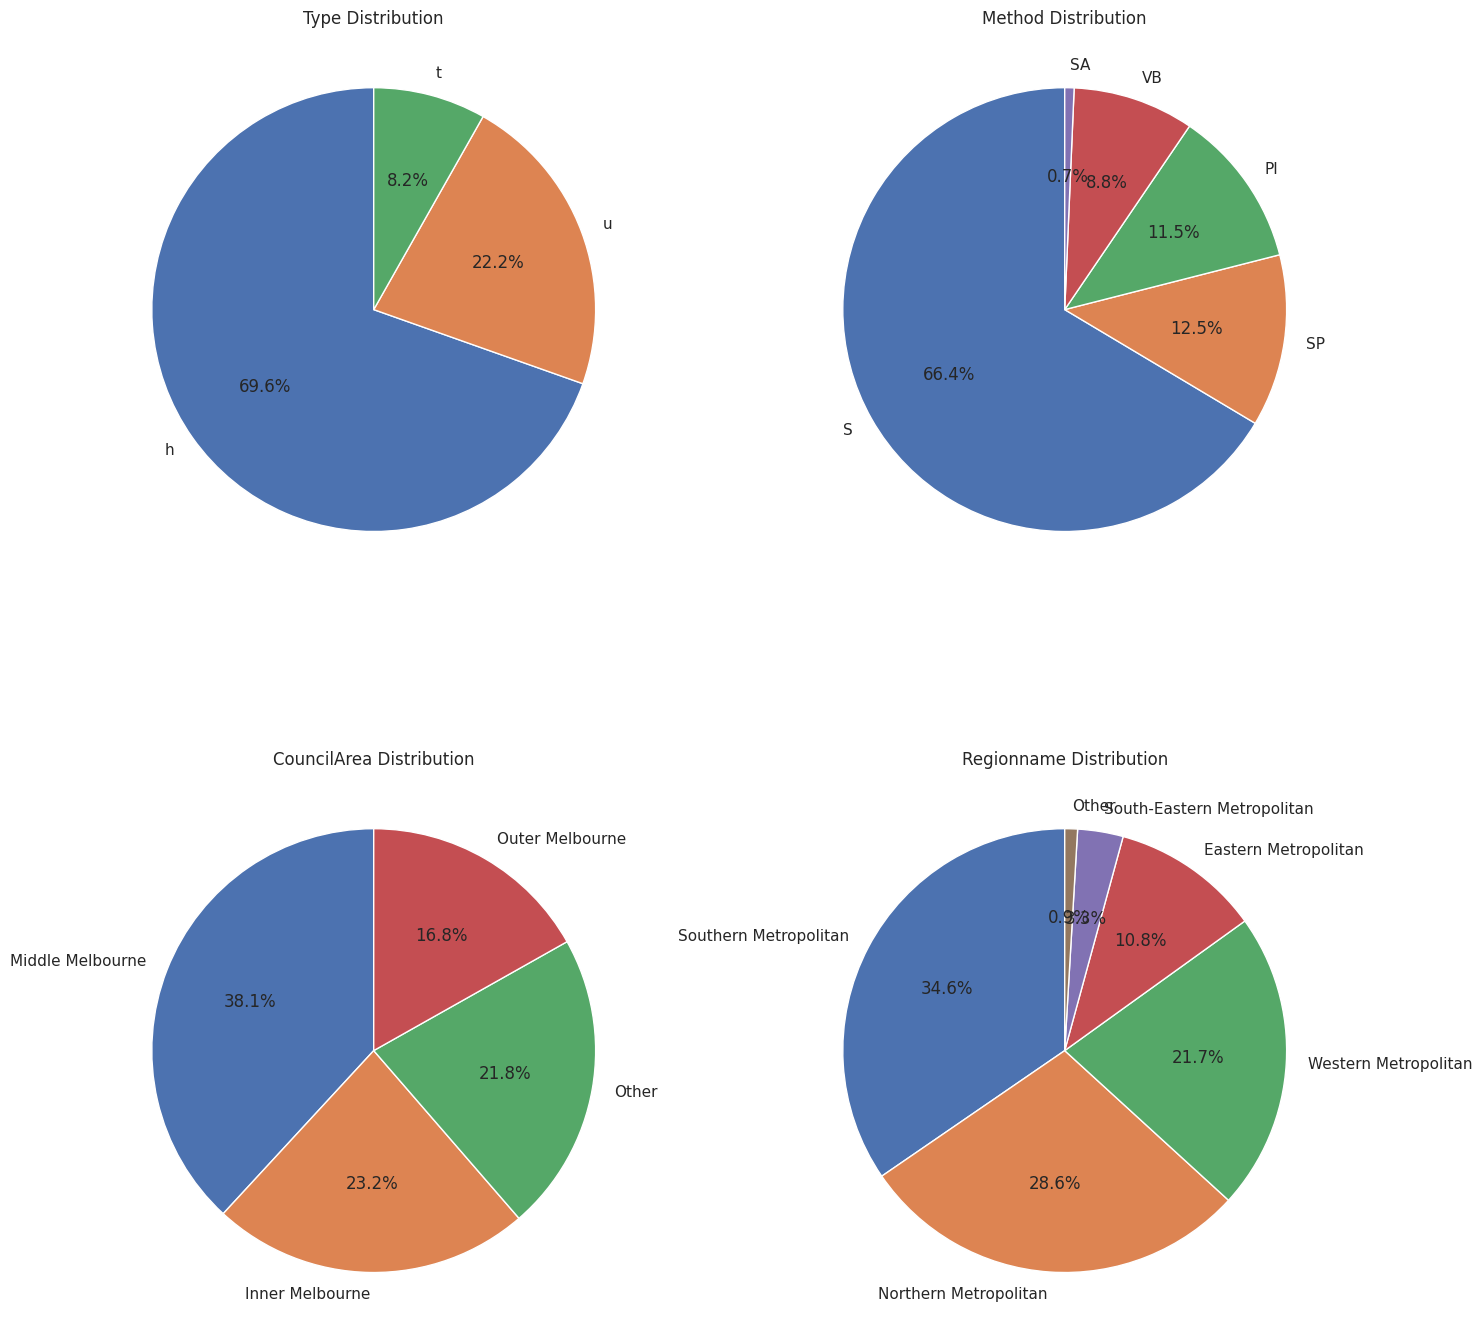

In [ ]:
# Specify the maximum number of categories to show individually
max_categories = 5

cat_vars = ['Type', 'Method', 'CouncilArea', 'Regionname']

# Create a figure and axes
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

# Create a pie chart for each categorical variable
for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        # Count the number of occurrences for each category
        cat_counts = df[var].value_counts()

        # Group categories beyond the top max_categories as 'Other'
        if len(cat_counts) > max_categories:
            cat_counts_top = cat_counts[:max_categories]
            cat_counts_other = pd.Series(cat_counts[max_categories:].sum(), index=['Other'])
            cat_counts = cat_counts_top.append(cat_counts_other)

        # Create a pie chart
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)

        # Set a title for each subplot
        axs.flat[i].set_title(f'{var} Distribution')

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Remove rows where 'YearBuilt' < 1800
df = df[df['YearBuilt'] >= 1800]

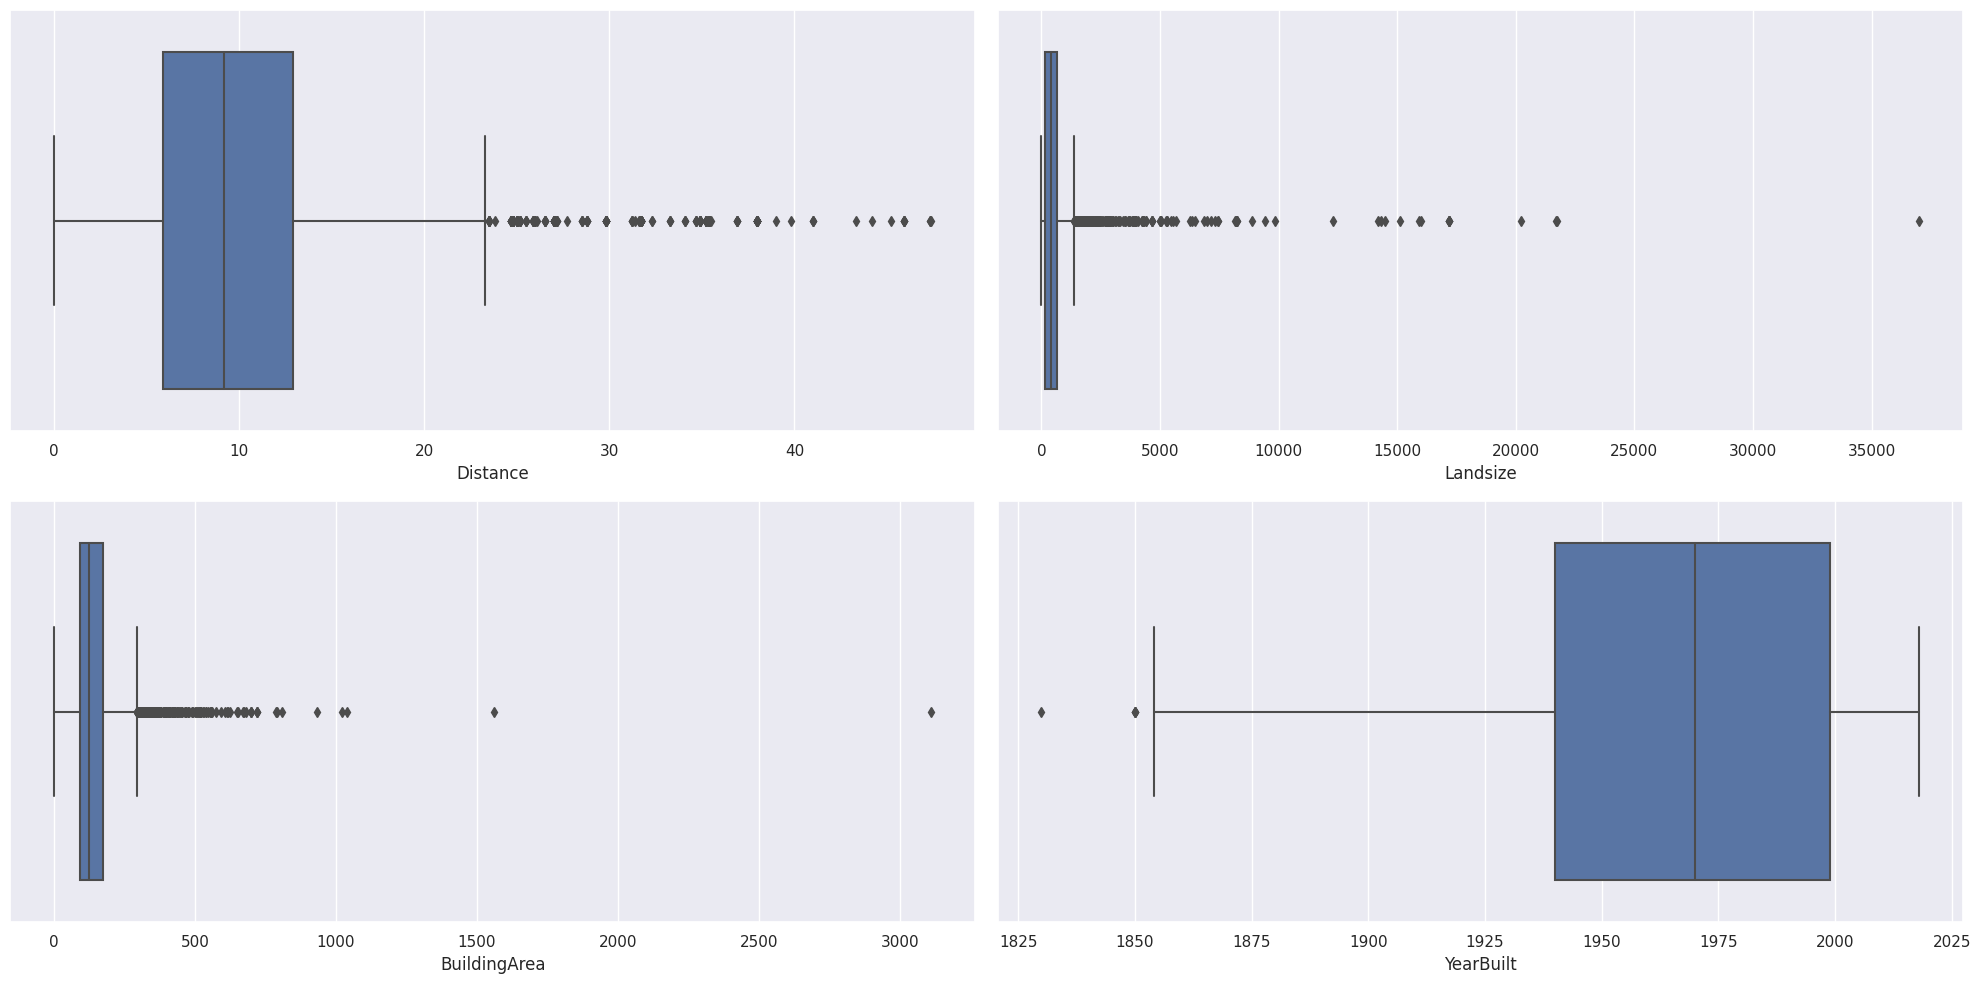

In [ ]:
num_vars = ['Distance', 'Landsize', 'BuildingArea', 'YearBuilt']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

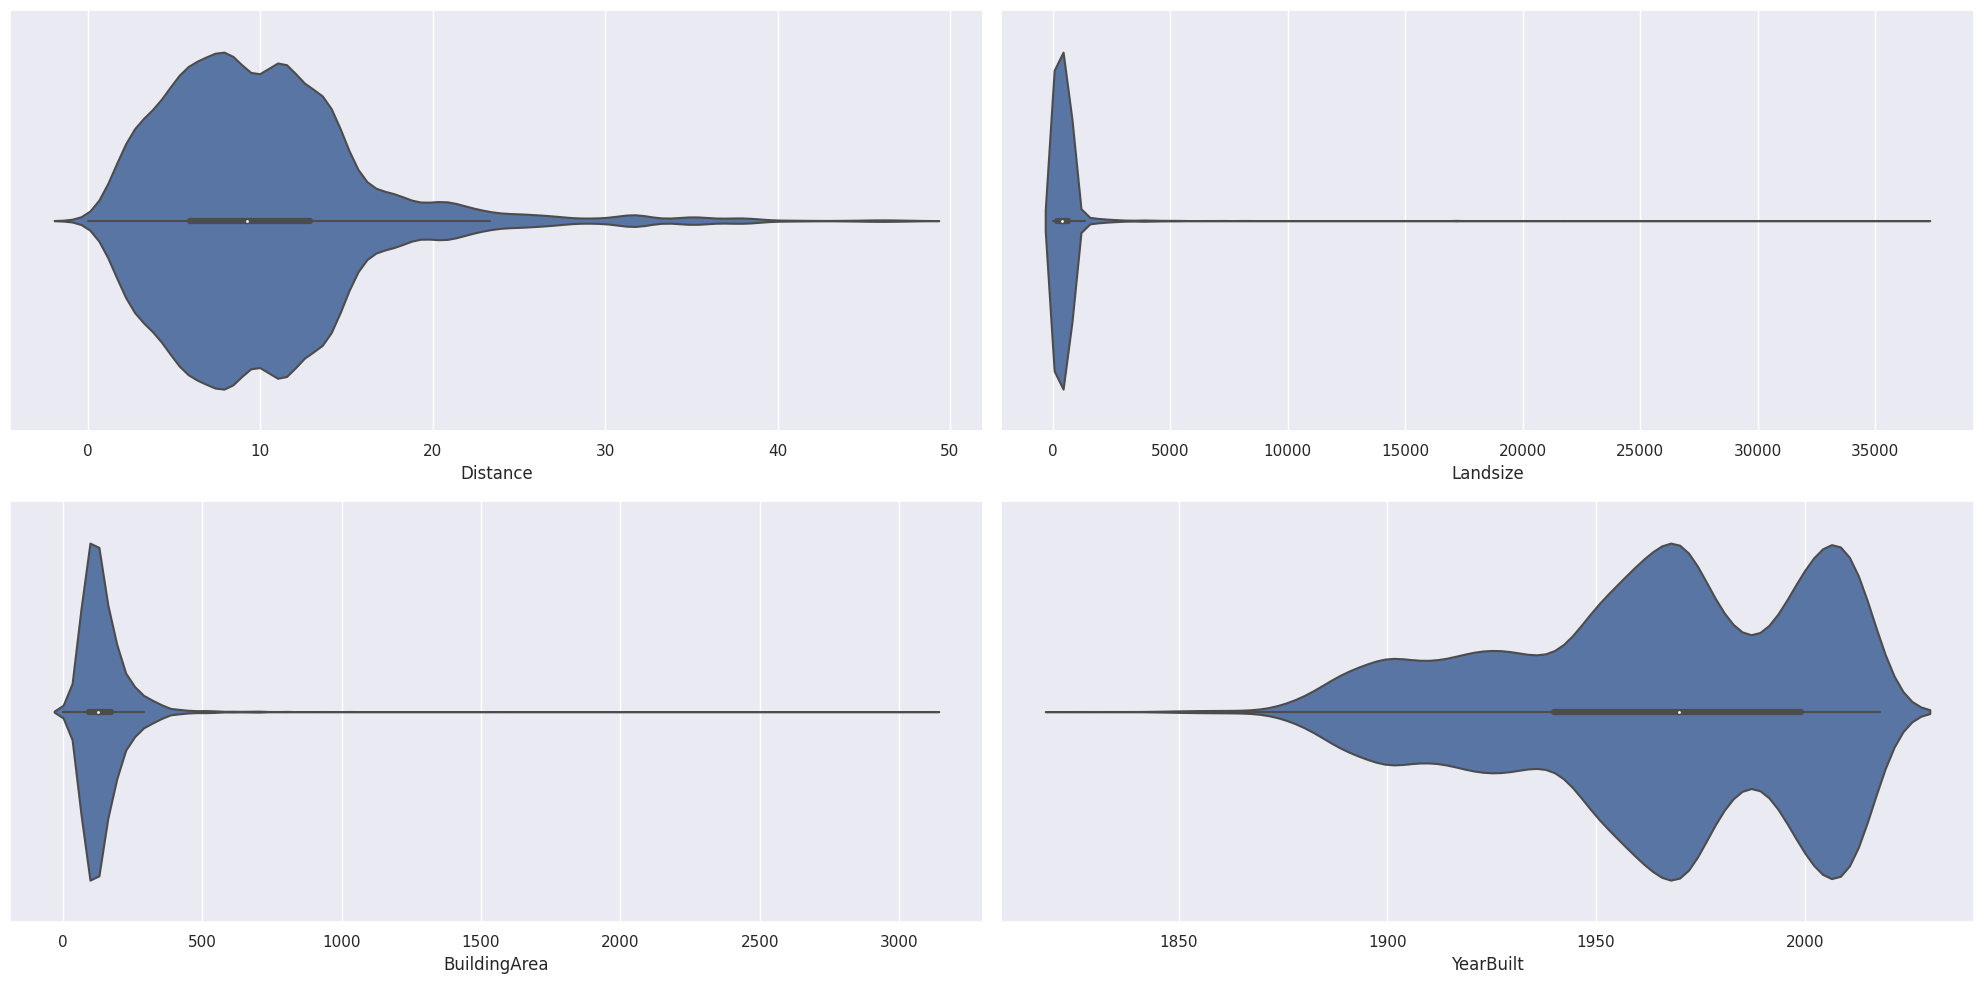

In [ ]:
num_vars = ['Distance', 'Landsize', 'BuildingArea', 'YearBuilt']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

<ipython-input-25-1b3d13501760>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='YearBuilt', y='Price', hue='Type', data=df, ci=None, estimator='mean', alpha=0.7)


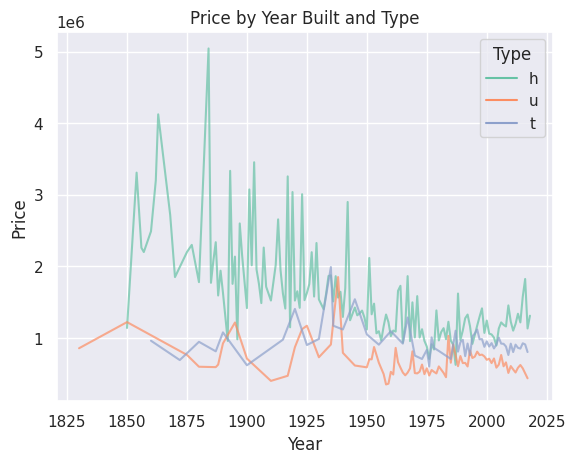

In [ ]:
sns.set_style("darkgrid")
sns.set_palette("Set2")

sns.lineplot(x='YearBuilt', y='Price', hue='Type', data=df, ci=None, estimator='mean', alpha=0.7)

plt.title("Price by Year Built and Type")
plt.xlabel("Year")
plt.ylabel("Price")

plt.show()

<ipython-input-26-a13514af9a4b>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='YearBuilt', y='Price', hue='Method', data=df, ci=None, estimator='mean', alpha=0.7)


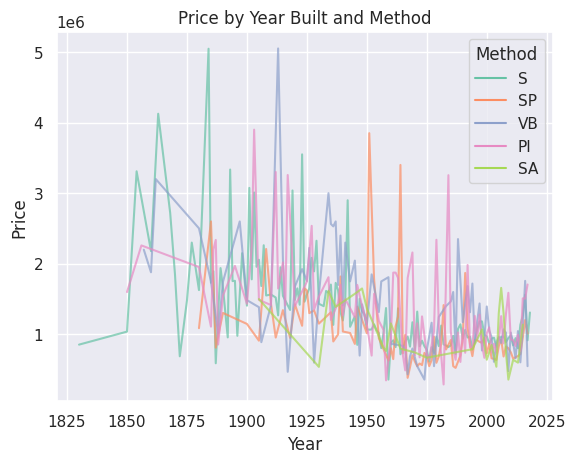

In [ ]:
sns.set_style("darkgrid")
sns.set_palette("Set2")

sns.lineplot(x='YearBuilt', y='Price', hue='Method', data=df, ci=None, estimator='mean', alpha=0.7)

plt.title("Price by Year Built and Method")
plt.xlabel("Year")
plt.ylabel("Price")

plt.show()

<ipython-input-27-21edcefc1f8c>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='YearBuilt', y='Price', hue='CouncilArea', data=df, ci=None, estimator='mean', alpha=0.7)


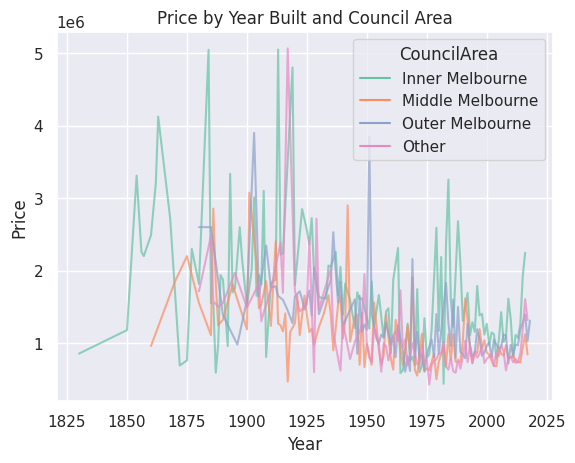

In [ ]:
sns.set_style("darkgrid")
sns.set_palette("Set2")

sns.lineplot(x='YearBuilt', y='Price', hue='CouncilArea', data=df, ci=None, estimator='mean', alpha=0.7)

plt.title("Price by Year Built and Council Area")
plt.xlabel("Year")
plt.ylabel("Price")

plt.show()

<Axes: xlabel='BuildingArea', ylabel='Price'>

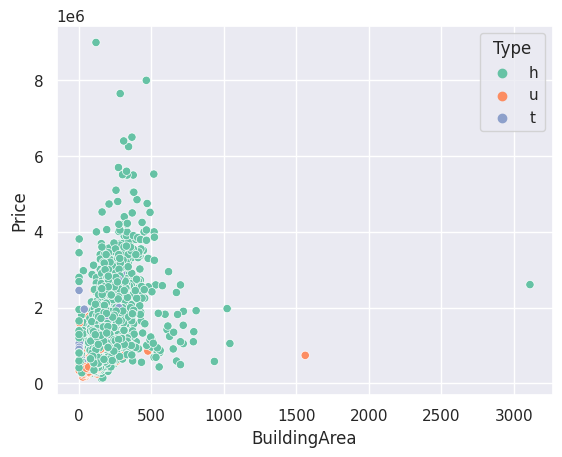

In [ ]:
sns.scatterplot(x='BuildingArea', y='Price', hue='Type', data=df)

<Axes: xlabel='BuildingArea', ylabel='Price'>

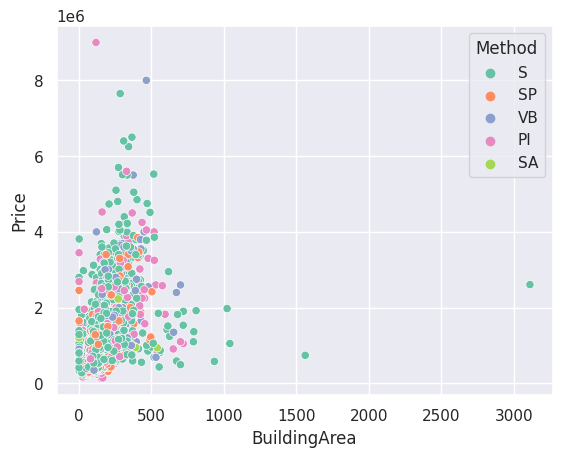

In [ ]:
sns.scatterplot(x='BuildingArea', y='Price', hue='Method', data=df)

<Axes: xlabel='BuildingArea', ylabel='Price'>

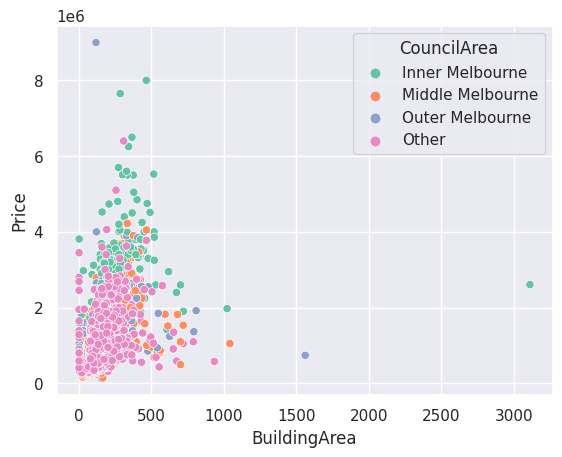

In [ ]:
sns.scatterplot(x='BuildingArea', y='Price', hue='CouncilArea', data=df)

<Axes: xlabel='BuildingArea', ylabel='Price'>

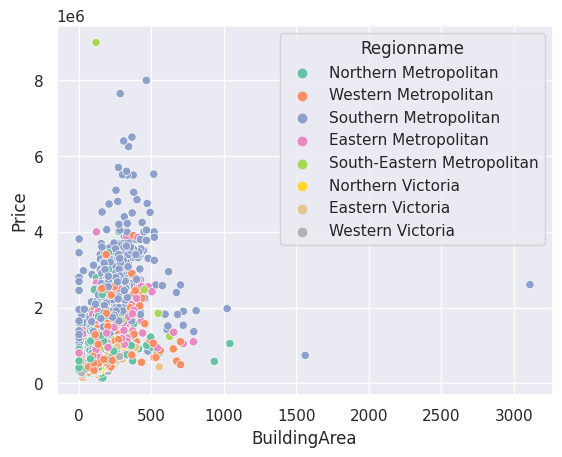

In [ ]:
sns.scatterplot(x='BuildingArea', y='Price', hue='Regionname', data=df)

# Data Preprocessing Part 2

In [ ]:
# Check missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

BuildingArea    16.418820
Car              0.377864
dtype: float64

In [ ]:
df.shape

(8204, 17)

In [ ]:
# Remove null value in 'Car' column because the aamount of null value only 0,3 %
# Remove rows with missing values in 'Car' column
df.dropna(subset=['Car'], inplace=True)

In [ ]:
df.shape

(8173, 17)

In [ ]:
# Fill null value with median in 'BuildingArea' column
df['BuildingArea'].fillna(df['BuildingArea'].median(), inplace=True)

In [ ]:
# Check missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

# Label Encoding for each object dataype

In [ ]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

Type: ['h' 'u' 't']
Method: ['S' 'SP' 'VB' 'PI' 'SA']
CouncilArea: ['Inner Melbourne' 'Middle Melbourne' 'Outer Melbourne' 'Other']
Regionname: ['Northern Metropolitan' 'Western Metropolitan' 'Southern Metropolitan'
 'Eastern Metropolitan' 'South-Eastern Metropolitan' 'Northern Victoria'
 'Eastern Victoria' 'Western Victoria']


In [ ]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())
    
    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])
    
    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

Type: [0 2 1]
Method: [1 3 4 0 2]
CouncilArea: [0 1 3 2]
Regionname: [2 6 5 0 4 3 1 7]


# Correlation Heatmap

<Axes: >

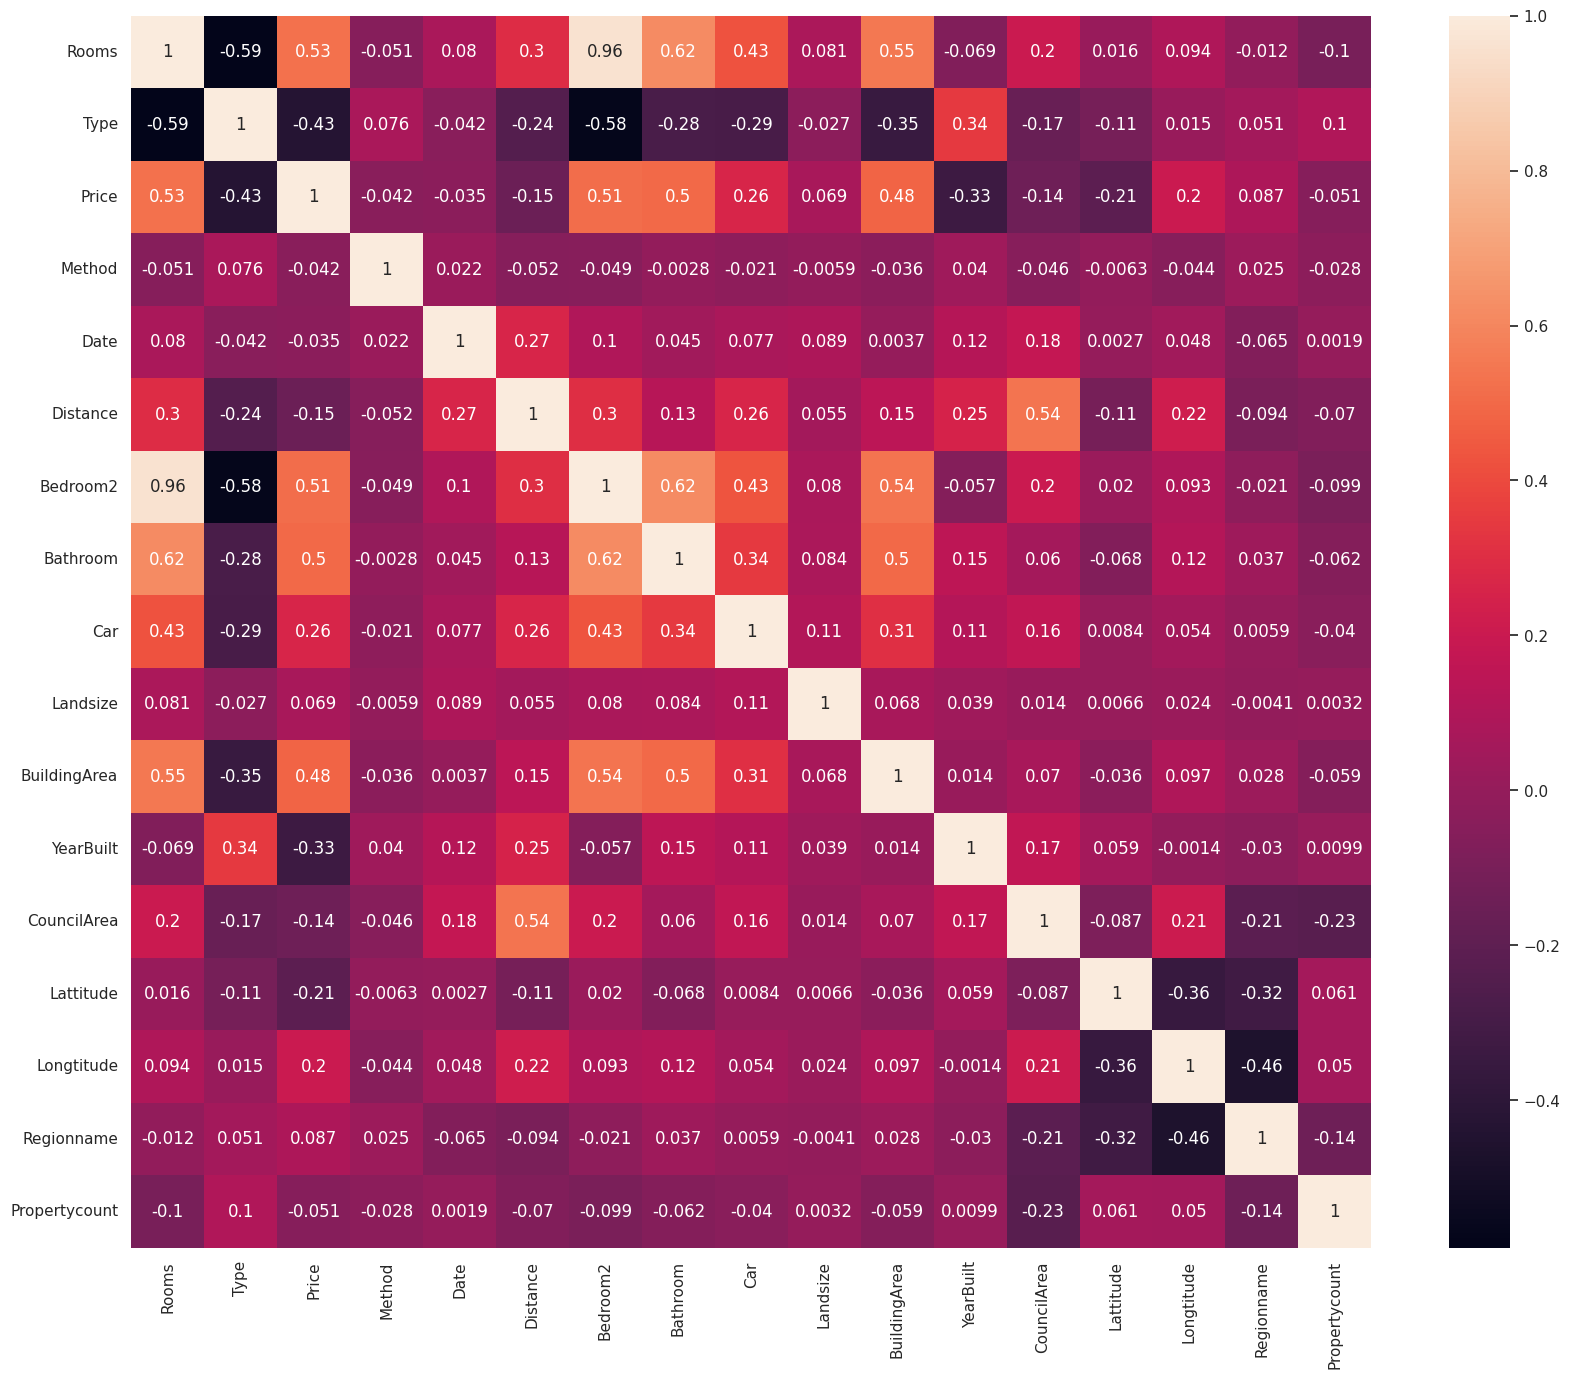

In [ ]:
#Correlation Heatmap (print the correlation score each variables)
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
# Select the features (X) and the target variable (y)
X = df.drop('Price', axis=1)
y = df['Price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Remove the Outlier from train data using Z-Score

In [ ]:
from scipy import stats

# Define the columns for which you want to remove outliers
selected_columns = ['Distance', 'Landsize', 'BuildingArea', 'YearBuilt']

# Calculate the Z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(X_train[selected_columns]))

# Set a threshold value for outlier detection (e.g., 3)
threshold = 3

# Find the indices of outliers based on the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove the outliers from the training data
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

# Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV



# Create a DecisionTreeRegressor object
dtree = DecisionTreeRegressor()

# Define the hyperparameters to tune and their values
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [0, 42]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

{'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 2, 'random_state': 0}


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=0, max_depth=8, max_features='auto', min_samples_leaf=3, min_samples_split=2)
dtree.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(max_depth=8, max_features='auto', min_samples_leaf=3,
                      random_state=0)

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = dtree.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 234313.4426791598
MAPE is 0.22338672889575736
MSE is 164167106863.86633
R2 score is 0.6097678627102774
RMSE score is 405175.4025898738


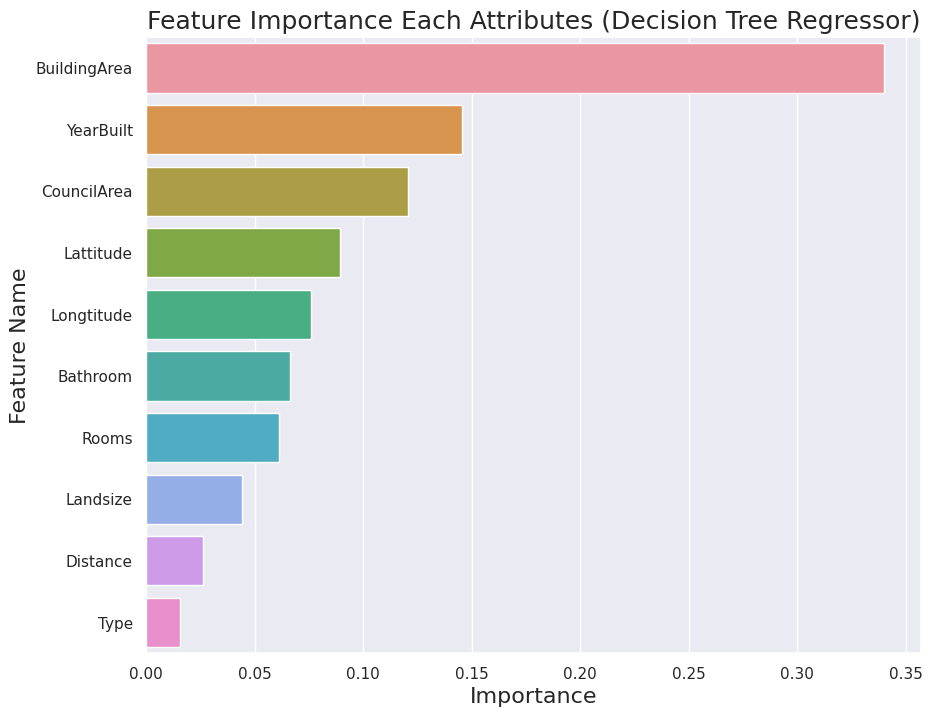

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Decision Tree Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

# XGBoost Regressor

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Create an XGBRegressor object
xgb = XGBRegressor()

# Define the hyperparameters to tune and their values
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000],
    'random_state': [0, 42]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 1000, 'random_state': 0}


In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor(max_depth=4, learning_rate=0.1, n_estimators=1000, random_state=0)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = xgb.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 168304.62752293577
MAPE is 0.16508000857069768
MSE is 82933694762.89609
R2 score is 0.8028631095540022
RMSE score is 287982.1084076163


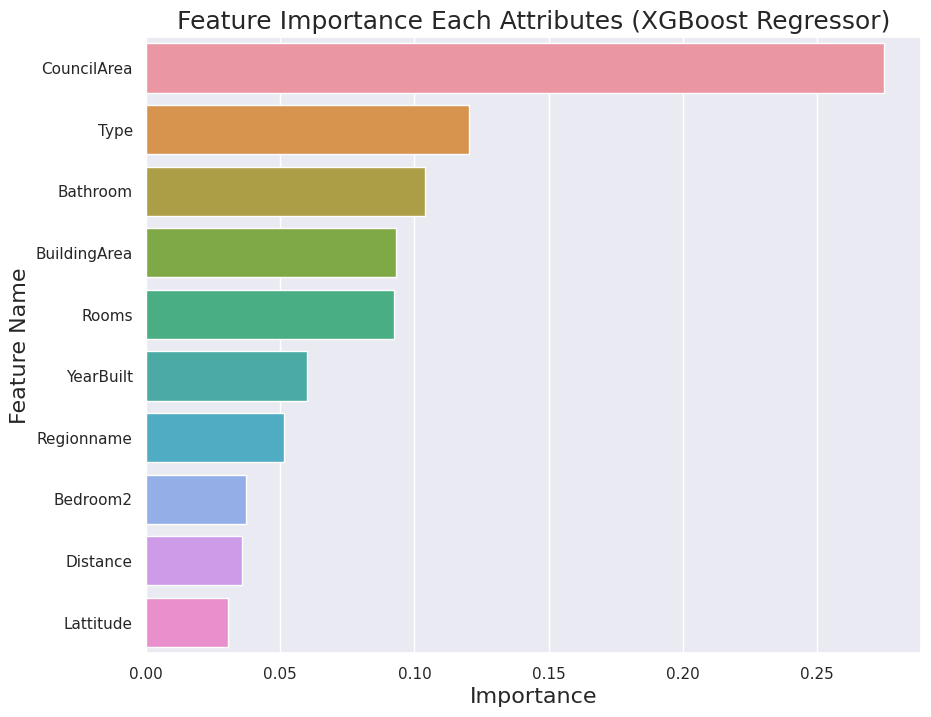

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": xgb.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (XGBoost Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()